
# Introduction 
We have dataset that tells us about student perforamance. 

## Objective
* To understand the data and generate succinct analysis from it.

## Importing packages 
- This time we will also include statsmodels for our correlation analysis.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files 
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving students_performance.csv to students_performance.csv


## Create a function to generate an overview of the data 
- Here we will create a function to generate an overview of the data.
### Why function?

- Functions are a programming concept that allows us to organize our code into sections. This organization makes code easier to read, but also allows the programmer to reuse code throughout a program. So please please utilise that!
- Another great habit to do in a function is docstring. Docstring allow you and other users to know what the function does and return.



In [4]:
def overview():
    # Creating docstring.
    '''
    Read a comma-separated values (csv) file into DataFrame.
    Print `head` of the data
    Print `shape` of the data
    Print `datatype` for each column
    Print number of NULL/NaN values for each column
    Print summary data
    
    Return:
    data, rtype: DataFrame
    '''
    data = pd.read_csv("students_performance.csv")
    print("The first 5 rows of data are:\n", data.head())
    print("\n")
    print("The (Row,Column) is:\n", data.shape)
    print("\n")
    print("Data type of each column:\n", data.dtypes)
    print("\n")
    print("The number of null values in each column are:\n", data.isnull().sum())
    print("\n")
    print("Summary of all the test scores:\n", data.describe())
    return data

df = overview()

The first 5 rows of data are:
    gender race/ethnicity  ... reading score writing score
0  female        group B  ...            72            74
1  female        group C  ...            90            88
2  female        group B  ...            95            93
3    male        group A  ...            57            44
4    male        group C  ...            78            75

[5 rows x 8 columns]


The (Row,Column) is:
 (1000, 8)


Data type of each column:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


The number of null values in each column are:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math

- As expected from a generator, we do not see any NaN values.
- Also, the summary of the test score shows that the scores do not vary that much among the 3 types of test.

## Looking into distribution of test score among each variable
- In this exercise, I will create pairplot for each variable (gender vs score, race vs score, parental level of education vs score, lunch vs score, test preparation course vs score)

### Gender vs score

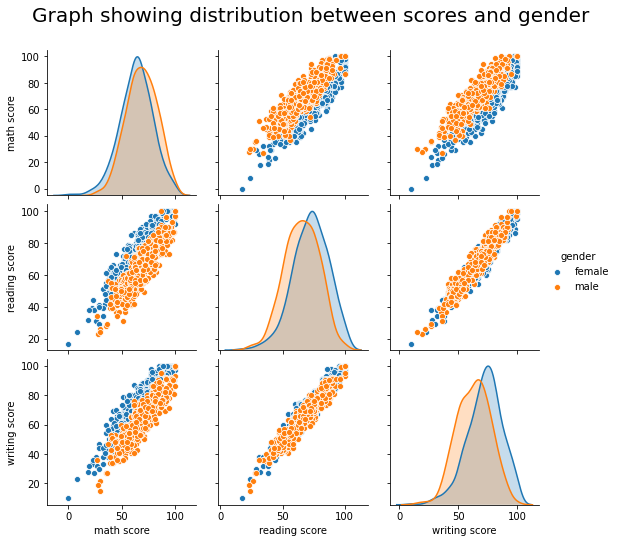

In [11]:
def distribution(dataset,variable,size=2.5):
    '''
    Args:
        dataset: Include DataFrame here
        variable: Include which column (categorical) in the data frame should be used for colour encoding.
    
    Returns:
    Seaborn plot with colour encoding
    '''
    g = sns.pairplot(data = dataset, hue = variable, height = size)
    g.fig.suptitle('Graph showing distribution between scores and {}'.format(variable), fontsize = 20)
    g.fig.subplots_adjust(top= 0.9)
    return g

distribution(df, 'gender',)

**Analysis**
* Pair plots show that females are better at reading and writing, while males are better at maths.

### Score and race


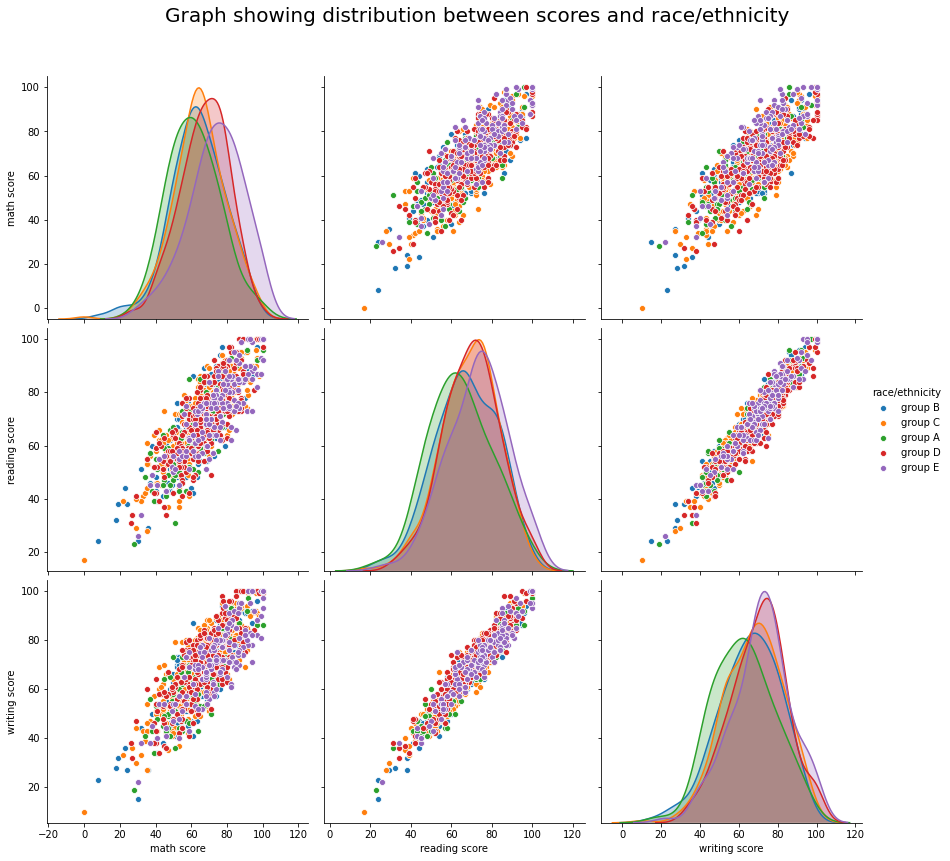

In [0]:
distribution(df, 'race/ethnicity', size=4)

**Analysis**
- Though nothing much can be discerned from the pairplots.
* Group A has performed worse of all, across all 3 scores.

### Score and parental education level

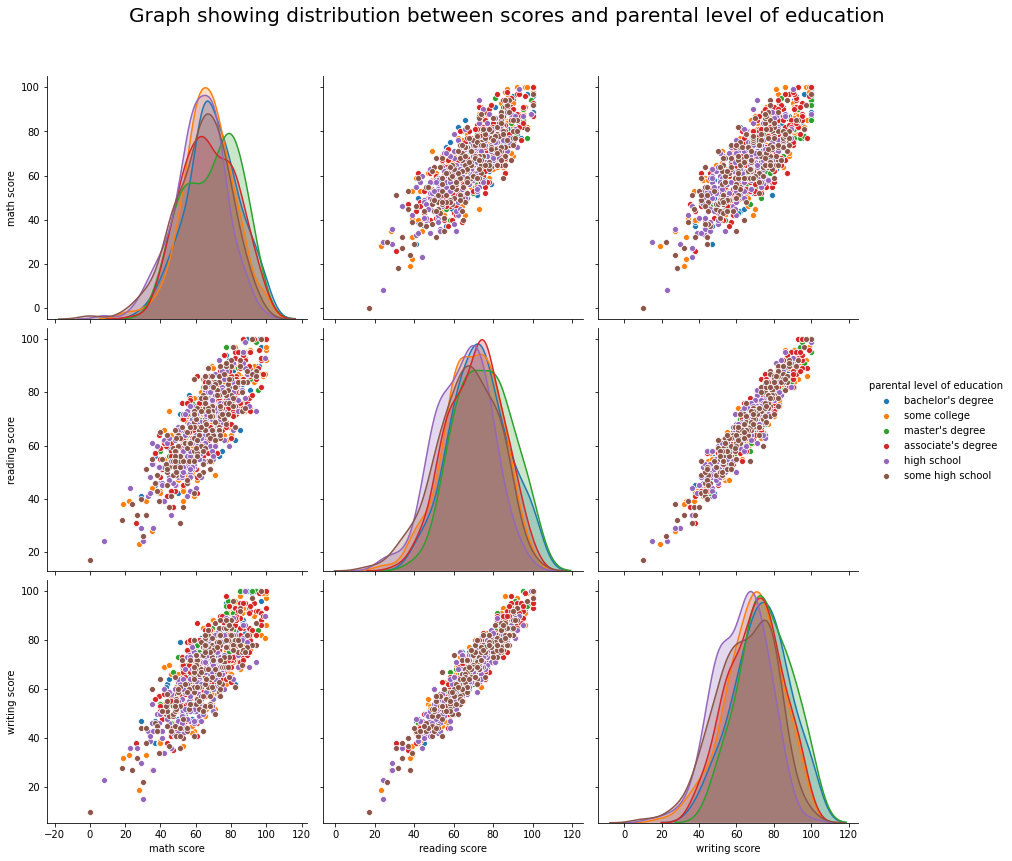

In [0]:
distribution(df, 'parental level of education', size=4)

**Analysis**
* Higher education of parents leads to a slight better score of students, with exception of Maths in which students of parents with a Master's degree fared exceptionally better than the rest.


### Score and lunch

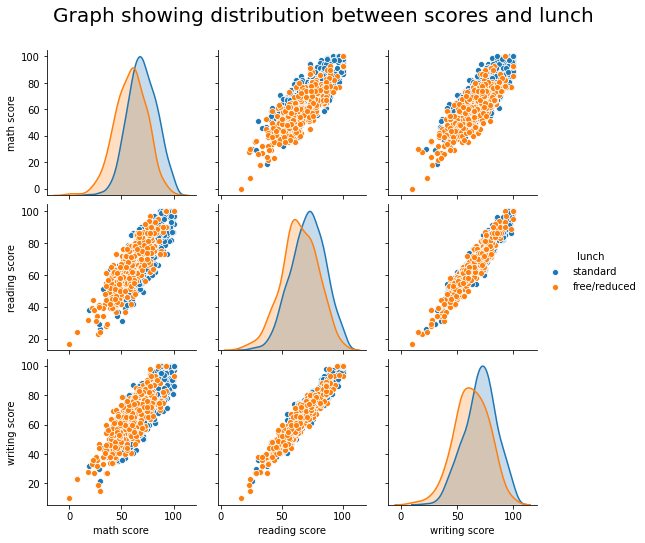

In [12]:
distribution(df, 'lunch')

**Analysis**
* Students with standard lunch scored better in all subjects than students with free or reduced lunch.

### Score vs Test preparation course 

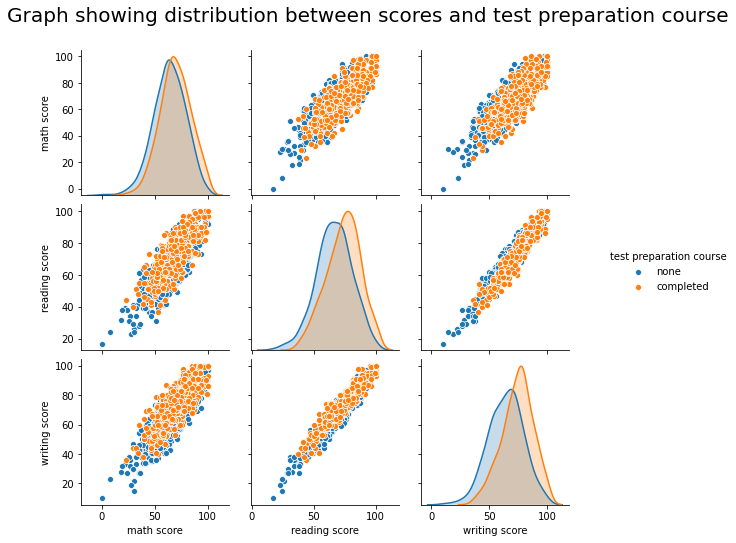

In [0]:
distribution(df, 'test preparation course')

**Analysis**
* For math:
  * Students with completed test preparation course did slightly better than the others.
- For reading and writing:
  * The difference of score between students who have completed the test preparation course and those who have not is exceptionally high.

* **It goes to show that the test preparation course helps in getting better scores, and is therefore effective.**

## Finding correlation between variables and test scores 
Given that all variables here is a categorical data, we will need to use 1-way ANOVA test to calculate correlation.

### What is one way ANOVA?
- This technique can be used only for numerical response data, the "Y", usually one variable, and numerical or (usually) categorical input data, the "X", always one variable, hence "one-way".
#### 1-Way ANOVA hypothesis 
- The null hypothesis (H0) is that there is no difference between the groups and equality between means. (Polar bears weigh the same in different months)
- The alternative hypothesis (H1) is that there is a difference between the means and groups. (Polar bears have different weights in different months) 

### 1-Way ANOVA assumptions
- Normality – That each sample is taken from a normally distributed population
- Sample independence – That each sample has been drawn independently of the other samples
- Variance Equality – That the variance of data in the different groups should be the same
- Your dependent variable – Example, “weight”, should be continuous – that is, measured on a scale which can be subdivided using increments (i.e. grams, milligrams)

## Our hypothesis
- We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
 * The null hypothesis is that they are independent.
 * The alternative hypothesis is that they are correlated in some way.

In [6]:
# Note that I have changed the name for each column here. StatsModels don't accept spaces so I modify each column.
df.columns = ['gender', 'race', 'parental_edu', 'lunch', 'test_prep_course', 'math_score', 'reading_score', 'writing_score']

def anova_test(data, variable):
    '''
    Args: data (DataFrame), variable: Categorical columns that you want to do 1-way ANOVA test with
    
    Returns: Nothing
    '''
    x = ['math_score', 'reading_score', 'writing_score']
    for i,k in enumerate(x):
        lm = ols('{} ~ {}'.format(x[i],variable), data = data).fit()
        table = sm.stats.anova_lm(lm)
        print("P-value for 1-way ANOVA test between {} and {} is ".format(x[i],variable),table.loc[variable,'PR(>F)'])

anova_test(df, 'gender')

P-value for 1-way ANOVA test between math_score and gender is  9.120185549333453e-08
P-value for 1-way ANOVA test between reading_score and gender is  4.680538743934009e-15
P-value for 1-way ANOVA test between writing_score and gender is  2.0198777068682407e-22


**Analysis**
- We obtained a P-value < 0.05, which means that the `Null Hypothesis` is invalid.

### Correlation between race and score

In [8]:
anova_test(df, 'race')

P-value for 1-way ANOVA test between math_score and race is  1.3732194030370688e-11
P-value for 1-way ANOVA test between reading_score and race is  0.0001780089103235852
P-value for 1-way ANOVA test between writing_score and race is  1.0979189070066777e-05


**Analysis**
- We obtained a P-value < 0.05, so `Null Hypothesis` is invalid which means `Score` and `Race` are co-related in some way.

### Correlation between parental education and score

In [9]:
anova_test(df, 'parental_edu')

P-value for 1-way ANOVA test between math_score and parental_edu is  5.592272384108375e-06
P-value for 1-way ANOVA test between reading_score and parental_edu is  1.1682457045709003e-08
P-value for 1-way ANOVA test between writing_score and parental_edu is  1.1202799969774331e-13


**Analysis**
- We obtained a P-value < 0.05, so `Null Hypothesis` is invalid which means `Score` and `Parental Education` are co-related in some way.


### Correlation between lunch and score

In [10]:
anova_test(df, 'lunch')

P-value for 1-way ANOVA test between math_score and lunch is  2.413195599315183e-30
P-value for 1-way ANOVA test between reading_score and lunch is  2.0027966545288553e-13
P-value for 1-way ANOVA test between writing_score and lunch is  3.1861895831680456e-15


**Analysis**
- We obtained a P-value < 0.05, so `Null Hypothesis` is invalid which means `Score` and `Lunch` are co-related in some way.

### Correlation between test prep course and score

In [11]:
anova_test(df, 'test_prep_course')

P-value for 1-way ANOVA test between math_score and test_prep_course is  1.5359134607155386e-08
P-value for 1-way ANOVA test between reading_score and test_prep_course is  9.081783336895556e-15
P-value for 1-way ANOVA test between writing_score and test_prep_course is  3.6852917352476696e-24


**Analysis**
- We obtained a P-value < 0.05, so `Null Hypothesis` is invalid which means `Score` and `Test Preparation Score` are co-related in some way.

## Does the education level of the parents really affect the student's score?

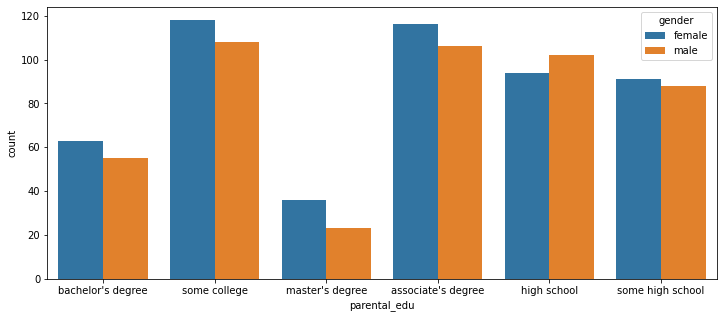

In [0]:
plt.figure(figsize=(12,5))

sns.countplot(data = df, x = 'parental_edu', hue = 'gender')

- We can see that there are only a few students whose parents have a Masters or Bachelor degree. Hence, I don't think we can confidently say that students with highly educated parents will score better. 

## Summary

*  Females are bettter at reading and writing; Males are better at mathematics.
* Group A race has the worst performing students among all races.
* Though, the number of datas for parents with Master's degree is low, it can be assumed that **Students whose parents hold master's degree fare better than other students**
* Accoutrements such as good lunch, access to test preparation course help students perform better overall.
* 1-way ANOVA states that null hypothesis for all factors are false, and the means of the factors are significantly different from each other.

